<div style="border:solid blue 2px; padding: 20px">
<b> Reviewer Rules</b>

Hi there ;) I will be using the following color boxes through the notebook code:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Green means that it was nicely done.
    
</div>    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what could be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>      
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Red is for things that must be done or changed for me to approve the project. If I rejected the project, you must look for this comments.
    
</div>    
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.

<div style="border:solid blue 2px; padding:20px;">

**Overall Summary of the Project**

Dear Mazin,

Thank you for submitting your project on identifying the best region for a new oil well on behalf of the OilyGiant mining company. Below is a detailed review of your work based on the key evaluation criteria.

---

✅ Strengths

1. **Data Preparation and Splitting:**
   - You loaded data for three regions (`region_1`, `region_2`, and `region_3`) and verified that there were no missing values or duplicates.
   - You split each region’s dataset into training (75%) and validation (25%) sets, aligning with the project instructions.
   - You dropped the `id` column and selected `product` as the target, which properly sets up a regression task.

2. **Model Training and Testing:**
   - You trained three **separate** Linear Regression models—one for each region—fulfilling the requirement that each region be modeled independently.
   - You calculated both the **average predicted volume** of reserves and **RMSE** for each model, as specified in the instructions.

3. **Profit Calculation Approach:**
   - You implemented a `profitcalc` function to pick the **top 200 wells** based on predicted reserves and then computed profit by subtracting the fixed budget from total expected revenue.
   - You correctly used the cost and revenue values (USD 100 million budget, 200 wells, USD 4.5 revenue per barrel) to align with the business constraints.

4. **Bootstrapping for Risk Assessment:**
   - You performed a bootstrapping procedure with 1,000 samples of 500 observations each, which matches the instruction to estimate the distribution of potential outcomes.
   - You reported each region’s **average profit** and **risk of loss**, thereby enabling a meaningful comparison of profitability and uncertainty.

5. **Balanced Discussion of Results:**
   - Your conclusion recognized that while a region might appear more profitable initially, bootstrapping illuminated risk factors that shifted your final recommendation to **Region 2** (lowest risk, solid profit).

---

⚠️ Areas for Improvement (Optional)

1. **Enhance In-Code Commentary:**  
   - Although your notebook is mostly clear, consider adding more inline comments near key calculations (e.g., RMSE, top 200 wells selection) to explain exactly why each step is taken.

2. **Detailed Step-by-Step Findings:**  
   - Brief explanations immediately after each region’s result would reinforce clarity. For instance, after computing each region’s RMSE, you might highlight specific numeric comparisons or mention the significance for the final decision.

3. **Visualizations:**  
   - While you do present a bar chart of raw profit comparisons, additional visualizations—like a histogram of bootstrapped profit distributions—could clarify how each region’s risk profile differs.

---

⛔️ Critical Changes Required

Just a minor step regarding the features of the dataset in the EDA step ;) You almost got it!

---

**Status: waiting for a minor change for approval**

</div>

<div style="border:solid blue 2px; padding:20px;">

**Overall Summary of the Project Iter 2**

Great work, Mazin! Project approved ;)

# Predicting Oilwell Reserve Profitability Through Linear Regression

## Introduction

The OilyGiant mining company has hired us to review their data and perform linear regression modeling to predict which wells have the greatest volume of reserves and will be most profitable. OilyGiant has $100M USD and wants to optimize its ROI.

Using data for 3 regions, we will train models to predict the oil volume of new reserves, as well as the average profit, 95% confidence interval, and risk of losses. This information will identify the most promising region for OilyGiant's future exploration efforts. 

We will calculate the financial break-even point to understand how much oil is required to develop at a profit, and then write a function to calculate profit at the top well prospects that our models identify. By the end, we should have an understanding of how much oil the top wells are likely to have, what regions they are located in, and use the bootstrapping technique to find the distribution of profit, average profit, and 95% confidence interval. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

It's a really good practice to add an introduction. It is as important as the conclusion ;)
</div>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#loading CSV datasets
region_1 = pd.read_csv('/datasets/geo_data_0.csv')
region_2 = pd.read_csv('/datasets/geo_data_1.csv')
region_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
region_1.info()
region_2.info()
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

All 3 databases have 100k values and do not appear to be missing any data. The data types of the 5 columns appear to be correct as well, with id as object and the f-numbers and product(oil reserves) as floats.

In [4]:
region_1.info

<bound method DataFrame.info of           id        f0        f1        f2     product
0      txEyH  0.705745 -0.497823  1.221170  105.280062
1      2acmU  1.334711 -0.340164  4.365080   73.037750
2      409Wp  1.022732  0.151990  1.419926   85.265647
3      iJLyR -0.032172  0.139033  2.978566  168.620776
4      Xdl7t  1.988431  0.155413  4.751769  154.036647
...      ...       ...       ...       ...         ...
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 5 columns]>

The values in the F columns are signed floats so negative numbers are not a problem.  

In [5]:
display(f"Region 1", region_1.describe())
display(f"Region 2", region_2.describe())
display(f"Region 3", region_3.describe())

'Region 1'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


'Region 2'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


'Region 3'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


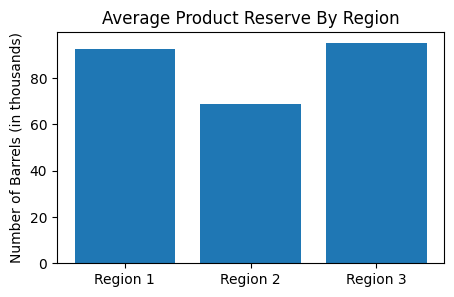

In [32]:
product_means =[region_1['product'].mean(), region_2['product'].mean(), region_3['product'].mean()]
x = np.array(["Region 1", "Region 2", "Region 3"])
y = product_means        
plt.figure(figsize=(5, 3))
plt.title('Average Product Reserve By Region')
plt.ylabel("Number of Barrels (in thousands)")
plt.bar(x,y)
plt.show()


#product_means.plot(kind='bar')

This data is synthetic as Oilywell has not explained the significance of the f-numbers (f0, f1, f2) in our data, only to say that the features themselves are significant. These numbers may speak to oil quality but we do not know.   

The 3 regions share some similarities such as having at least 1 well with 0 product reserves, comparable f2 values, and very similar standard deviations of product reserves. However it is regions 1 & 3 that are the most alike. Both regions have ~20% more product reserves and share lower f0 and f1 numbers on average than region 2. It will be interesting to see whether our models find these regions the most promising for future exploration based on the greater product reserves of existing wells. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

Let's analyze the distributions of features in each dataframe. Would you add charts? 
   
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment Iter 2</b>

Nice job!

</div>

## Training & Testing by Region

Having confirmed that our data appears complete, we will use it to train our models and make predictions. The data will be split into training and validation sets at a ratio of 75:25. The training set will be used for training our model and generating predictions, and the validation set will be used to determine the accuracy of those predictions.

We will split our data into training and validation at a ratio of 75:25. We will train our model on the training set and make predictions that we will assess using the validation set. We will use the Root Mean Squared Error (RMSE) to evaluate the difference between predicted and actual values in the datasets. 

In [7]:
#dropping 'id' column across all 3 sets as logistic regression will not accept object types
for region in [region_1, region_2, region_3]:
    region.drop('id', axis=1, inplace=True)

# region_1 = region_1.drop('id', axis=1)
# region_2 = region_1.drop('id', axis=1)
# region_3 = region_1.drop('id', axis=1)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

Good   
    
</div>

######  Splitting Our Data

We will split our data into training and validation sets. Our models will use the training sets to train and make predictions on, and the validation sets to assess accuracy. 

In [8]:
#extracting the features and targets for region 1 
features_1 = region_1.drop(['product'], axis=1)  
target_1 = region_1['product']                   

#splitting the data into validation and training sets at a ratio of 75:25
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25)

#extracting the features and targets for region 2
features_2 = region_2.drop(['product'], axis=1)  
target_2 = region_2['product']                   

#splitting the data into validation and training sets at a ratio of 75:25
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25)

#extracting the features and targets for region 3 
features_3 = region_3.drop(['product'], axis=1)  
target_3 = region_3['product']                   

#splitting the data into validation and training sets at a ratio of 75:25
features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
    features_3, target_3, test_size=0.25)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

Correct
    
</div>

######  Training our Models & Making Predictions

In [9]:
#creating a model for region 1
model1 = LinearRegression() 
model1.fit(features_train_1, target_train_1)               #fitting/training the model using the training set
predicted_valid_1 = model1.predict(features_valid_1)       #making predictions for the validation set
display("Model 1 has been trained")

#creating a model for region 2
model2 = LinearRegression() 
model2.fit(features_train_2, target_train_2)               #fitting/training the model using the training set
predicted_valid_2 = model2.predict(features_valid_2)       #making predictions for the validation set
display("Model 2 has been trained")

#creating a model for region 3
model3 = LinearRegression() 
model3.fit(features_train_3, target_train_3)               #fitting/training the model using the training set
predicted_valid_3 = model3.predict(features_valid_3)       #making predictions for the validation set
display("Model 3 has been trained")

'Model 1 has been trained'

'Model 2 has been trained'

'Model 3 has been trained'

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

Correct
   
</div>

######  Assessing Our Predictions

#### Region 1

In [10]:
#saving our models predictions
predicted_valid_1 = model1.predict(features_valid_1)

#calculating the RMSE of the predictions
RMSE = mean_squared_error(target_valid_1, predicted_valid_1)**0.5

#printing average volume of predicted reserves 
print(f'Average volume of predicted reserves:',round(predicted_valid_1.mean(),2),'thousand barrels')

#printing RMSE
print("RMSE of the linear regression model on the validation set:", round(RMSE,2))

Average volume of predicted reserves: 92.43 thousand barrels
RMSE of the linear regression model on the validation set: 37.46


The model predicts 92.56k barrels in average product reserves for region 1, quite close to the actual 92.50k average. The RMSE of nearly 38 is high indicating our model struggled in correctly predicting product volume. 

#### Region 2

In [11]:
#saving our models predictions
predicted_valid_2 = model2.predict(features_valid_2)

#calculating the RMSE of the predictions
RMSE = mean_squared_error(target_valid_2, predicted_valid_2)**0.5

#printing average volume of predicted reserves 
print(f'Average volume of predicted reserves:',round(predicted_valid_2.mean(),2),'thousand barrels')

#printing RMSE
print("RMSE of the linear regression model on the validation set:", round(RMSE,2))

Average volume of predicted reserves: 68.88 thousand barrels
RMSE of the linear regression model on the validation set: 0.9


Region 2 shows almost 69k barrels on average and with a much lower RMSE of 0.89. This indicates that the   although with a moderate RMSE of 0.89, this is a much more accurate prediction with less than 900k barrels of deviation.  

#### Region 3

In [12]:
#saving our models predictions
predicted_valid_3 = model3.predict(features_valid_3)

#calculating the RMSE of the predictions
RMSE = mean_squared_error(target_valid_3, predicted_valid_3)**0.5

#printing average volume of predicted reserves 
print(f'Average volume of predicted reserves:',round(predicted_valid_3.mean(),2),'thousand barrels')

#printing RMSE
print("RMSE of the linear regression model on the validation set:", round(RMSE,2))

Average volume of predicted reserves: 94.73 thousand barrels
RMSE of the linear regression model on the validation set: 39.89


The model predicts 95k barrels of product with a high RMSE of almost 40, or 40k barrels. The similarities between regions 1 & 3 continue with models for both producing incorrect guesses.   

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

Correct
   
</div>

## Calculating Profit 

In [13]:
#breakeven point =$100M investment/ 200 wells/ $4500 per barrel 
budget = 100000000
new_wells = 200 
price_barrel= 4500
breakeven = 100000000 / new_wells / price_barrel

In [14]:
display(round(breakeven,2))

111.11

In [15]:
display(f'the company needs wells with', round(breakeven, 2), 'thousand barrels to recoup its investment. This works out to',
        round(200 * breakeven, 2), 'thousand barrels in total.')

'the company needs wells with'

111.11

'thousand barrels to recoup its investment. This works out to'

22222.22

'thousand barrels in total.'

Oily needs 111k barrels per well on average to realize profits, or just over 22M. Any additional revenue will be realized as a profit, and I believe regions 1 & 3 are much likelier regions than region 2 to host such wells. 

In [16]:
print(predicted_valid_1)

[109.31927037  91.37575657 127.22241552 ...  90.89054646 114.70965853
  85.39277251]


In [17]:
#creating a function to calculate profit

def profitcalc(target, predicted):
    predictions_sorted = predicted.sort_values(ascending=False)    #sorting predicted values by size
    top_wells = target[predictions_sorted.index][:new_wells]          #creating a new 'top_wells' variable with top 200 wells                                         
    profit = (top_wells.sum() * price_barrel) - budget
    return profit

predicted = [pd.Series(predicted_valid_1), pd.Series(predicted_valid_2), pd.Series(predicted_valid_3)]
targets = [target_valid_1.reset_index(drop=True) , target_valid_2.reset_index(drop=True), target_valid_3.reset_index(drop=True)]
profits = []

for region in range(len(predicted)):
    profits.append(profitcalc(targets[region], predicted[region]))
    
display(profits)

[32080341.110413745, 24150866.966815114, 27812049.50608678]

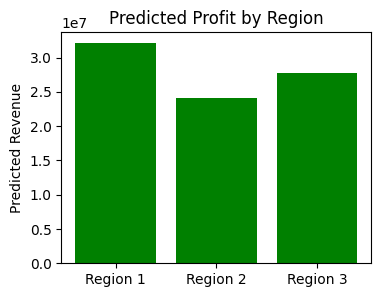

In [18]:
lista = ['Region 1', 'Region 2', 'Region 3']

plt.figure(figsize=(4, 3))
#creating a chart of profits
plt.bar(lista, profits, color='green')

# Add labels and title
plt.ylabel("Predicted Revenue")
plt.title("Predicted Profit by Region")

# Show the plot
plt.show()

#plot profits by region
#profits.plot(kind=bar)

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

Correct, but.... don't forget that is a risk associate, what you will see in the next step
   
</div>

### Bootstrapping data to confirm profitability and risk of loss

Region 1 appears to be the most profitable of the regions we have data for. However, we are running the risk of cherrypicking data and will bootstrap the data with 1000 samples to find the distribution of profit while accounting for the risk of loss as well.

In [20]:
def profit_distribution(target, predictions):
   
    #initializing a random state
    state = np.random.RandomState(12345)
    
    #initializing values
    values=[]
    
#     #creating a combined dataframe of  predictions and targets
#     #all_dfs = pd.DataFrame
#     all_dfs['predictions'] = predictions
#     all_dfs['targets'] = targets
    
    #obtaining 1000 samples through bootstrapping
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state) 
        predictions_subsample = predictions[target_subsample.index]                   #including predictions subsample
        values.append(profitcalc(target_subsample, predictions_subsample))   #calling profit function to calculate profit
        
     #converting empty values into a pandas series
    values = pd.Series(values)
    
    # Calculate the mean of the profits
    mean = values.mean()
    
    # Obtain the upper and lower bounds of the 95% confidence interval
    upper = values.quantile(0.975)
    lower = values.quantile(0.025)
    
    # Determine the probability of negative profit (loss)
    count = 0
    for value in values:
        if value < 0:
            count += 1
    return mean, count/len(values) 
mean_1, count_1 = profit_distribution(target_valid_1.reset_index(drop=True), pd.Series(predicted_valid_1))
mean_2, count_2 = profit_distribution(target_valid_2.reset_index(drop=True), pd.Series(predicted_valid_2))
mean_3, count_3 = profit_distribution(target_valid_3.reset_index(drop=True), pd.Series(predicted_valid_3))

In [23]:
display(f"The average profit for Region 1 is: {mean_1} with a risk of loss of {count_1*100}%")
display(f"The average profit for Region 2 is: {mean_2} with a risk of loss of {count_2*100}%")
display(f"The average profit for Region 3 is: {mean_3} with a risk of loss of {round(count_3*100, 2)}%")

'The average profit for Region 1 is: 4539347.406925483 with a risk of loss of 5.0%'

'The average profit for Region 2 is: 5422594.237178056 with a risk of loss of 0.3%'

'The average profit for Region 3 is: 4104801.17232471 with a risk of loss of 6.8%'

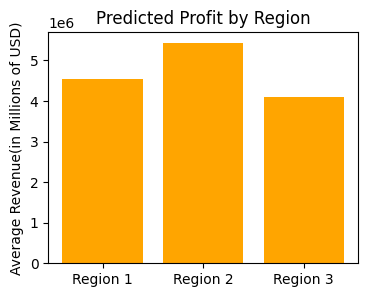

In [26]:
listb = [mean_1, mean_2, mean_3]

plt.figure(figsize=(4, 3))
#creating a chart of profits
plt.bar(lista, listb, color='orange')

# Add labels and title
plt.ylabel("Average Revenue(in Millions of USD)")
plt.title("Predicted Profit by Region")


# Show the plot
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

Correct! Well done ;)
   
</div>

## Conclusion

This project has taught us the importance of bootstrapping and never going by instincts alone. When we reviewed the raw data, regions 1 and 3 appeared to be the most promising with region 2 behind by a significant margin. After running our profit calculations, we found that region 1 was clearly the most promising region, ahead of regions 2 and 3. It is only when we accounted for the distribution of profit that we can appreciate the revenue potential of region 2- as it offers 19% greater profit than the next most profitable well, at a rate of risk that is reduced by 18x, or a factor of 4. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Reviewer's comment</b>

Perfect, great work Mazin! 
   
</div>

In [22]:
# display(target_valid_1.reset_index(drop=True).tail())
# display(pd.Series(predicted_valid_1).tail())